In [10]:
import gdpnum
import riskcal
import numpy as np
from matplotlib import pyplot as plt

In [51]:
from dp_accounting.pld.privacy_loss_distribution import from_randomized_response, from_gaussian_mechanism

In [43]:
eps = 1.0
p = 2 / (1 + np.exp(eps))
pld = from_randomized_response(p, num_buckets=2)
p

0.5378828427399902

In [44]:
alpha = np.linspace(0, 1, 50)

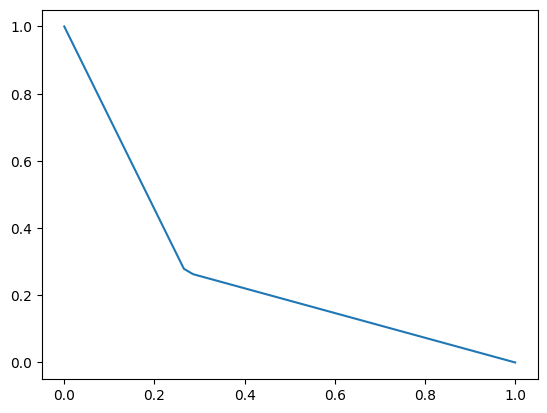

In [45]:
converter = gdpnum.PLDConverter(pld)
beta = converter.get_beta(alpha)
plt.plot(alpha, beta)

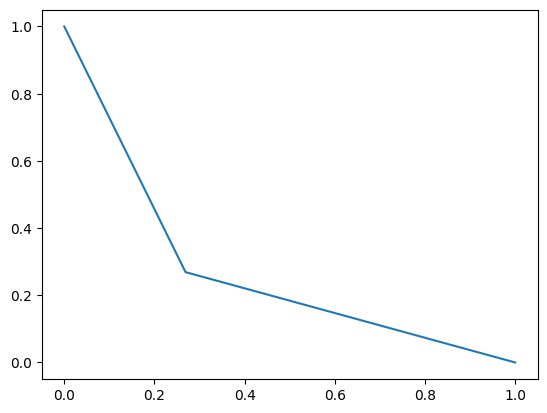

In [46]:
plt.plot(converter.alphas_symm, converter.betas_symm)

In [48]:
converter.get_mu()

1.232035385344901

In [47]:
gdpnum.get_worst_case_regret(converter.alphas_symm, converter.betas_symm, converter.get_mu())

0.0

In [49]:
 2**14 / 50_000

0.32768

In [53]:
sigma = 9.4
sample_rate = 0.328
steps = 2_000

    pld = from_gaussian_mechanism(
        standard_deviation=sigma,
        sampling_prob=sample_rate,
        use_connect_dots=True,
        value_discretization_interval=1e-3,
    ).self_compose(steps)

converter = gdpnum.PLDConverter(pld)
converter.get_mu_and_regret()

(1.5685621993129137, 0.0010208130697719753)